In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#READ THE CSV FILE
df = pd.read_csv("WHO-COVID-19-global-data.csv")
df = pd.DataFrame(df)

In [5]:
df_countries = df.groupby(df["Country"])

#KUWAIT
df_kwt = df_countries.get_group("Kuwait")
df_kwt = df_kwt.reset_index(drop = True)
df_kwt = df_kwt['Cumulative_cases']
df_kwt = pd.DataFrame(df_kwt)

#NORMALIZATION
pop_k = 4271000
df_kwt["Cumulative_cases_norm"] = df_kwt["Cumulative_cases"]/pop_k

kt = df_kwt
i = 0
while i < 97:
    kt = kt.drop(kt.index[0])
    i = i + 1

kt = kt.reset_index(drop = True)
kt["Cumulative_cases_norm"] = kt["Cumulative_cases"]/pop_k
kt["log"] = np.log(kt["Cumulative_cases_norm"])

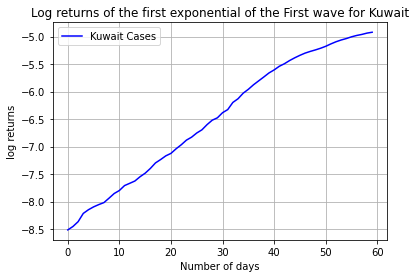

In [7]:
kt['log'][:60].plot(grid = True, label = 'Kuwait Cases', color = 'blue')
plt.legend()
plt.title("Log returns of the first exponential of the First wave for Kuwait")
plt.ylabel("log returns")
plt.xlabel("Number of days")
plt.show()

# KUWAIT (first wave)

**log P = c + rt -------------------1**

The First wave of Kuwait is 0-250 (in days). Each wave will have an exponential growth and logistic growth. The exponential growth is the high point of the wave where the cases are rising exponentially and rapidly. The logistic is the end part of the wave, where the cases are seemingly slowed down and it means the end of the first wave altogether. There may be multiple exponential and logistics growths within a wave.

Now from the graphs above, we know that

c = -8.52118

t = 250 (duration of the first wave)

log(P) = -3.37292 (from the log return graph at t = 250)

From 1,

-3.37292 = -8.52118 + 250.r

r = (-3.37292 + 8.52118)/250

r = 0.020593

In [9]:
r = 0.020593
from scipy.integrate import odeint
#Total population n
n = pop_k
#Initial number of infected and recovered individuals, i_0 and r_0
i_0 = kt["Cumulative_cases_norm"][0]
r_0 = 0

#beginning of the period s_0
s_0 = 1 - i_0 - r_0

# Assuming that people tend to recover within 10 days
b = 0.1
a = r + b

t = np.linspace(0, 250, 250)
#SIR model differential equations
def deriv(y, t, a, b):
    S, I, R = y
    dSdt = - a * S * I
    dIdt = a * (S * I) - (b * I)
    dRdt = b * I
    return dSdt, dIdt, dRdt

y0 = s_0, i_0, r_0
ret = odeint(deriv, y0, t, args=(a, b))
S, I, R = ret.T

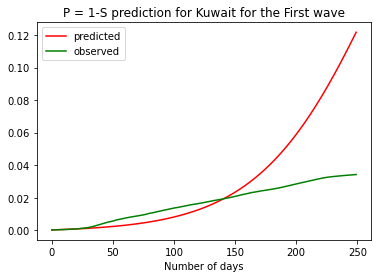

In [11]:
s = pd.DataFrame()
s["s"] = S
s["pred"] = 1 - s["s"]
s["pred"][:250].plot(c = 'red', label = 'predicted')
kt['Cumulative_cases_norm'][:250].plot(c = 'green', label = 'observed')
plt.title("P = 1-S prediction for Kuwait for the First wave")
plt.xlabel("Number of days")
plt.legend()
plt.show()

# KUWAIT (exp wave)

**log P = c + rt -------------------1**

The exponential of the First wave of Kuwait is 0-60 (in days).

Now from the graphs in the previous codes, we know that

c = -8.52118

t = 60 (duration of the exponential)

log(P) = -2.3937 (from the log return graph at t = 60)

From 1,

-2.3937 = -8.52118 + 60.r

r = (-4.89862 + 8.52118)/60

r = 0.060375

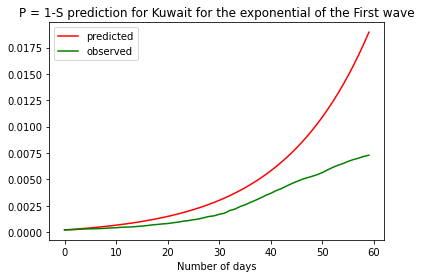

In [15]:
r = 0.060375
from scipy.integrate import odeint

# Total population n
n = pop_k
# Initial number of infected and recovered individuals, i_0 and r_0
i_0 = kt["Cumulative_cases_norm"][0]
r_0 = 0

# beginning of the period s_0
s_0 = 1 - i_0 - r_0

# Assuming that people tend to recover within 10 days
b = 0.1
a = r + b

t = np.linspace(0, 60, 60)
y0 = s_0, i_0, r_0
ret = odeint(deriv, y0, t, args=(a, b))
S, I, R = ret.T

s = pd.DataFrame()
s["s"] = S
s["pred"] = 1 - s["s"]
s["pred"].plot(c = 'red', label = 'predicted')
kt['Cumulative_cases_norm'][:60].plot(c = 'green', label = 'observed')
plt.title("P = 1-S prediction for Kuwait for the exponential of the First wave")
plt.xlabel("Number of days")
plt.legend()
plt.show()

# KUWAIT (first exp wave)

**log P = c + rt -------------------1**

The first exponential of the exponential of the First wave of Kuwait is 0-30 (in days).

Now from the graphs in the previous codes, we know that

c = -8.52118
t = 30 (duration of the exponential)

log(P) = -6.38441 (from the log return graph at t = 30)

From 1,

-6.38441 = -8.52118 + 30.r

r = (-6.38441 + 8.52118)/30

r = 0.07122

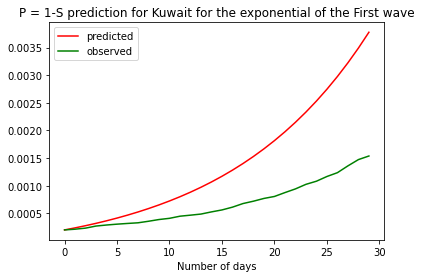

In [17]:
r = 0.07122
from scipy.integrate import odeint

#Total population n
n = pop_k
# Initial number of infected and recovered individuals, i_0 and r_0
i_0 = kt["Cumulative_cases_norm"][0]
r_0 = 0

# beginning of the period s_0
s_0 = 1 - i_0 - r_0
#Assuming that people tend to recover within 10 days
b = 0.1
a = r + b
t = np.linspace(0, 30, 30)
y0 = s_0, i_0, r_0
ret = odeint(deriv, y0, t, args=(a, b))
S, I, R = ret.T

s = pd.DataFrame()
s["s"] = S
s["pred"] = 1 - s["s"]
s["pred"].plot(c = 'red', label = 'predicted')
kt['Cumulative_cases_norm'][:30].plot(c = 'green', label = 'observed')
plt.title("P = 1-S prediction for Kuwait for the exponential of the First wave")
plt.xlabel("Number of days")
plt.legend()
plt.show()

# KUWAIT (logistic first wave)

**log P = c + rt -------------------1**

The first logistic of the exponential of the First wave of Kuwait is 31-60 (in days).

Now from the graphs in the previous codes, we know that

c = -6.328433

t = 30 (duration of the logistic)

log(P) = -4.89862 (from the log return graph at t = 30 and c = -6.328433)

From 1,

-6.38441 = -4.89862 + 60.r

r = (-6.38441 + 4.89862)/30

r = -0.04952

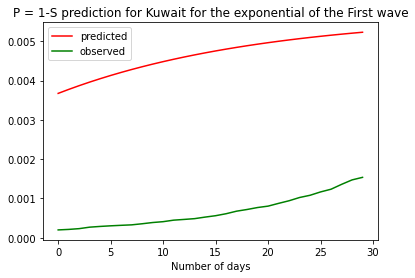

In [18]:
r = -0.04952
from scipy.integrate import odeint

#Total population n
n = pop_k
# Since the timeline starts from the 30th day, and assuming people recover in 10 days r would be +10 of i
r_0 = kt["Cumulative_cases_norm"][30]
i_0 = kt["Cumulative_cases_norm"][40] - r_0
# beginning of the period s_0
s_0 = 1 - i_0 - r_0
# Assuming that people tend to recover within 10 days
b = 0.1
a = r + b
t = np.linspace(0, 30, 30)
y0 = s_0, i_0, r_0
ret = odeint(deriv, y0, t, args=(a, b))
S, I, R = ret.T

s = pd.DataFrame()
s["s"] = S
s["pred"] = 1 - s["s"]
s["pred"].plot(c = 'red', label = 'predicted')
kt['Cumulative_cases_norm'][:30].plot(c = 'green', label = 'observed')
plt.title("P = 1-S prediction for Kuwait for the exponential of the First wave")
plt.xlabel("Number of days")
plt.legend()
plt.show()